**Follow the above steps to find dividends, dividend growth rate, and DCF of  5 stocks in SET50, namely**




1.  PTT
2.  AOT
3.  KBANK
4.  CPALL
5.  ADVANC



---


**Here, you will use only the data from 2016-01-01 to 2020-12-31




In [18]:
import pandas as pd
from pandas_datareader import data
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%mathplotlib inline
%config InlineBackend.figure_format='retina'

UsageError: Line magic function `%mathplotlib` not found.


In [19]:
df = data.DataReader('AOT.bk', data_source="yahoo", 
start='2016-01-01', 
end='2020-12-31')
df.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,35.099998,33.900002,34.900002,34.299999,30288000.0,32.061298
2016-01-05,34.500000,33.900002,34.400002,34.000000,31804000.0,31.780874
2016-01-06,34.299999,33.799999,34.000000,34.000000,27878000.0,31.780874
2016-01-07,33.799999,33.299999,33.799999,33.700001,30974000.0,31.500456
2016-01-08,34.099998,33.599998,33.900002,33.799999,27068000.0,31.593922


Text(0, 0.5, 'Difference in Change')

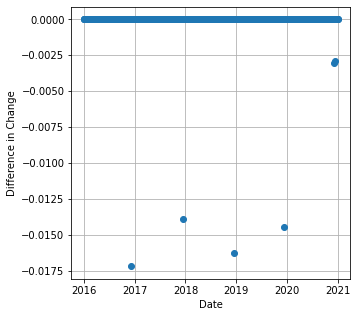

In [20]:

adj_close = df['Adj Close'] # adjusted close prices
pct_adj_close = adj_close.pct_change(1) # find daily percent changes 
close = df['Close'] # close price
pct_close = close.pct_change(1) # find daily percent changes 
plt.figure(figsize=(5,5))
plt.plot(pct_close- pct_adj_close, "o")
plt.grid()
plt.xlabel("Date")
plt.ylabel("Difference in Change")

In [21]:
delta = pct_close- pct_adj_close 
threshold = -0.001 # We pick threshold = -0.001 from the graph.
delta = delta[delta<threshold] # screen only the location where differences is less than -0.001
print("The dividens are paid out on:")
for date in delta.index:
  print(date.date())

The dividens are paid out on:
2016-12-08
2017-12-12
2018-12-13
2019-12-12
2020-12-04
2020-12-08


In [22]:
dividends =[]
for date in delta.index:
  k = np.nonzero(df.index==date)[0][0] # find the row where dividends have been paid.
  close_before = close[k-1]
  pct_close_div = pct_close[k]
  pct_adj_div = pct_adj_close[k]
  dividend = close_before * ( pct_adj_div - pct_close_div)
  dividends.append(dividend)
dividends = pd.Series(dividends, index=delta.index)
print(dividends)

Date
2016-12-08    0.687920
2017-12-12    0.868510
2018-12-13    1.046688
2019-12-12    1.079299
2020-12-04    0.194971
2020-12-08    0.194144
dtype: float64


In [23]:
yearly_dividends = []
for y in range(2016,2021): # Find dividens growth rate in the last 5 years.
  dividend_year = dividends[dividends.index.year == y] #filter only one year
  yearly_dividends.append(dividend_year.sum()) # find total dividens per year
yearly_dividends = pd.Series(yearly_dividends, index=np.arange(2016,2021))
dividend_growth = yearly_dividends.pct_change(1).dropna()
print("Yearly dividends: ")
print(yearly_dividends)
print("Dividend growth rate: ")
print(dividend_growth)
g = dividend_growth.median()
print(f"Dividends growth rate is {g*100} %.")

Yearly dividends: 
2016    0.687920
2017    0.868510
2018    1.046688
2019    1.079299
2020    0.389115
dtype: float64
Dividend growth rate: 
2017    0.262516
2018    0.205153
2019    0.031157
2020   -0.639475
dtype: float64
Dividends growth rate is 11.815492588762034 %.


In [24]:
r = 0.1 # Assume that we can find the risk-free security at 10%
S_AOT = yearly_dividends[2020]/(r - g) # D1/(r - g)
print(f"The current AOT stock price is {adj_close.iloc[-1]}.") # 
print(f"From the Discounted Cash Flow model, AOT Stock price is {S_AOT}.")


The current AOT stock price is 62.25.
From the Discounted Cash Flow model, AOT Stock price is -21.43301307153856.
